In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delays/airports.csv
/kaggle/input/flight-delays/airlines.csv
/kaggle/input/flight-delays/flights.csv


In [64]:
flight_df= pd.read_csv('/kaggle/input/flight-delays/flights.csv')

flight_df.info()

/tmp/ipykernel_35/2747938205.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flight_df= pd.read_csv('/kaggle/input/flight-delays/flights.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [65]:
flight_df['DEPARTURE_DELAY'].value_counts()

DEPARTURE_DELAY
-3.0       455407
-4.0       444053
-5.0       438844
-2.0       435237
-1.0       387475
            ...  
 1079.0         1
 1347.0         1
-61.0           1
 859.0          1
 1649.0         1
Name: count, Length: 1217, dtype: int64

### Arrival & Departure Delays 

In [66]:
correct_departure_values = (flight_df['DEPARTURE_DELAY'] == 0).sum()
delayed_departure_values = (flight_df['DEPARTURE_DELAY'] >0).sum()
early_departure_values = (flight_df['DEPARTURE_DELAY'] <0).sum()

print('Percentage of delays in departure {:.2f}%'.format(delayed_departure_values*100/flight_df.shape[0]))
print('Percentage of corrrect departure {:.2f}%'.format(correct_departure_values*100/flight_df.shape[0]))
print('Percentage of early departure {:.2f}%'.format(early_departure_values*100/flight_df.shape[0]))

Percentage of delays in departure 36.53%
Percentage of corrrect departure 5.66%
Percentage of early departure 56.33%


In [67]:
correct_arrival_values = (flight_df['ARRIVAL_DELAY'] == 0).sum()
delayed_arrival_values = (flight_df['ARRIVAL_DELAY'] >0).sum()
early_arrival_values = (flight_df['ARRIVAL_DELAY'] <0).sum()

print('Percentage of delays in arrivals {:.2f}%'.format(delayed_arrival_values*100/flight_df.shape[0]))
print('Percentage of corrrect arrivals {:.2f}%'.format(correct_arrival_values*100/flight_df.shape[0]))
print('Percentage of early arrival {:.2f}%'.format(early_arrival_values*100/flight_df.shape[0]))

Percentage of delays in arrivals 35.86%
Percentage of corrrect arrivals 2.17%
Percentage of early arrival 60.16%


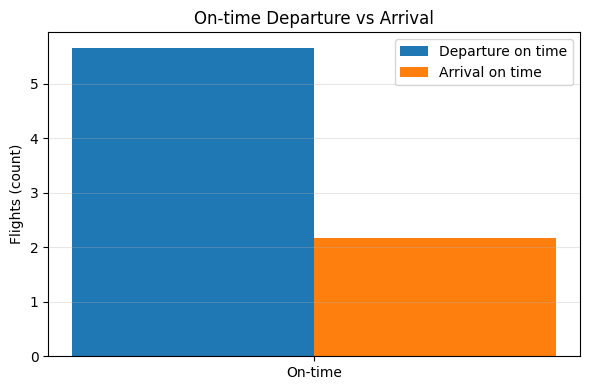

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# --- the values you've already computed ---
# dep_on_time  = correct_departure_values      # flights with DEPARTURE_DELAY == 0
# arr_on_time  = correct_arrival_values        # flights with ARRIVAL_DELAY   == 0

total_flights = len(flight_df)
# Or use percentages if you prefer:
dep_on_time = correct_departure_values * 100 / total_flights
arr_on_time = correct_arrival_values * 100 / total_flights


# --- plotting ---
labels = ['On-time']
x_pos  = np.arange(len(labels))          # = [0]
width  = 0.35                            # width of each bar

fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x_pos - width/2, dep_on_time,  width, label='Departure on time')
ax.bar(x_pos + width/2, arr_on_time,  width, label='Arrival on time')

ax.set_ylabel('Flights (count)')
ax.set_title('On-time Departure vs Arrival')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()


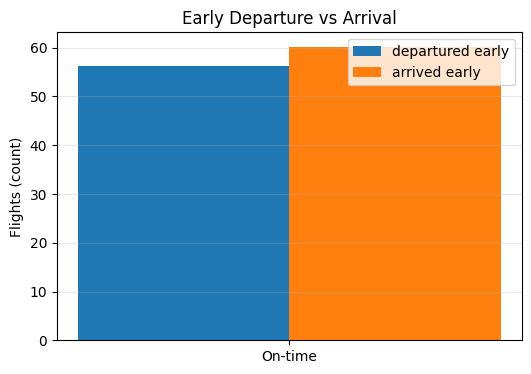

In [69]:
dep_early = early_departure_values *100 / total_flights
arrival_early = early_arrival_values*100 / total_flights
x_pos  = np.arange(len(labels))  


fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x_pos- width/2 ,dep_early, width, label = 'departured early')
ax.bar(x_pos+ width/2 ,arrival_early, width, label = 'arrived early')

ax.set_ylabel('Flights (count)')
ax.set_title('Early Departure vs Arrival')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.show()

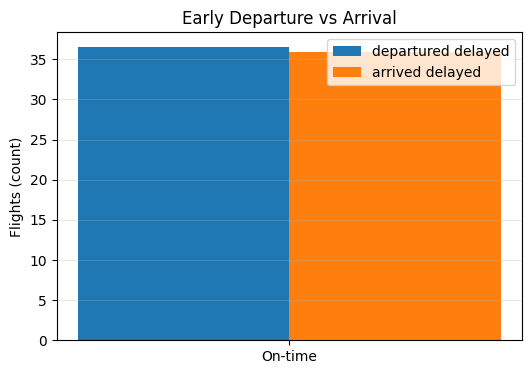

In [70]:
dep_delayed = delayed_departure_values *100 / total_flights
arrival_deplayed = delayed_arrival_values*100 / total_flights
x_pos  = np.arange(len(labels))  


fig, ax = plt.subplots(figsize=(6,4))

ax.bar(x_pos- width/2 ,dep_delayed, width, label = 'departured delayed')
ax.bar(x_pos+ width/2 ,arrival_deplayed, width, label = 'arrived delayed')

ax.set_ylabel('Flights (count)')
ax.set_title('Early Departure vs Arrival')
ax.set_xticks(x_pos)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.show()

In [71]:
filter_flight_df = flight_df.select_dtypes(exclude='object')
filter_flight_df = flight_df[['YEAR', 'MONTH','DAY', 'DAY_OF_WEEK','DEPARTURE_DELAY','ARRIVAL_DELAY']]


In [72]:
filter_flight_df.dropna()
filter_flight_df.corr()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,YEAR,MONTH,DAY,DAY_OF_WEEK,DEPARTURE_DELAY,ARRIVAL_DELAY
YEAR,NaN,NaN,NaN,NaN,NaN,NaN
MONTH,NaN,1.000000,0.008874,-0.007847,-0.021994,-0.036793
DAY,NaN,0.008874,1.000000,0.001111,-0.000176,-0.003097
DAY_OF_WEEK,NaN,-0.007847,0.001111,1.000000,-0.011510,-0.017027
DEPARTURE_DELAY,NaN,-0.021994,-0.000176,-0.011510,1.000000,0.944672
ARRIVAL_DELAY,NaN,-0.036793,-0.003097,-0.017027,0.944672,1.000000


##### day-to-day depature & arrival delay correlation

### early departures vs delayed arrivals

In [73]:
delay_conditions = '>0'
delay_departure_counts = (
    filter_flight_df[filter_flight_df['DEPARTURE_DELAY'] <= 0]
      .groupby(['YEAR', 'MONTH', 'DAY'])
      .size()                      # counts rows in each group
      .reset_index(name='num_departure_delays')
)

delay_arrival_counts = (
    filter_flight_df[filter_flight_df['ARRIVAL_DELAY'] > 0]
      .groupby(['YEAR', 'MONTH', 'DAY'])
      .size()                      # counts rows in each group
      .reset_index(name='num_arrival_delays')
)

filter_agg_df = pd.merge(delay_departure_counts, delay_arrival_counts, on=['YEAR', 'MONTH', 'DAY'], how='outer')
filter_agg_df

,YEAR,MONTH,DAY,num_departure_delays,num_arrival_delays
0,2015,1,1,7640,5707
1,2015,1,2,8317,8374
2,2015,1,3,5575,10002
3,2015,1,4,5192,11107
4,2015,1,5,6756,9080
...,...,...,...,...,...
360,2015,12,27,5934,8801
361,2015,12,28,5628,7631
362,2015,12,29,5277,9148
363,2015,12,30,5302,10047


In [74]:
filter_agg_df['DATE'] = pd.to_datetime(filter_agg_df[['YEAR', 'MONTH', 'DAY']])
filter_agg_df.set_index('DATE', inplace=True)
monthly_df = (
    filter_agg_df
    .resample('W')  # monthly frequency
    .sum()[[ 'num_departure_delays', 'num_arrival_delays']]
    .reset_index()
)


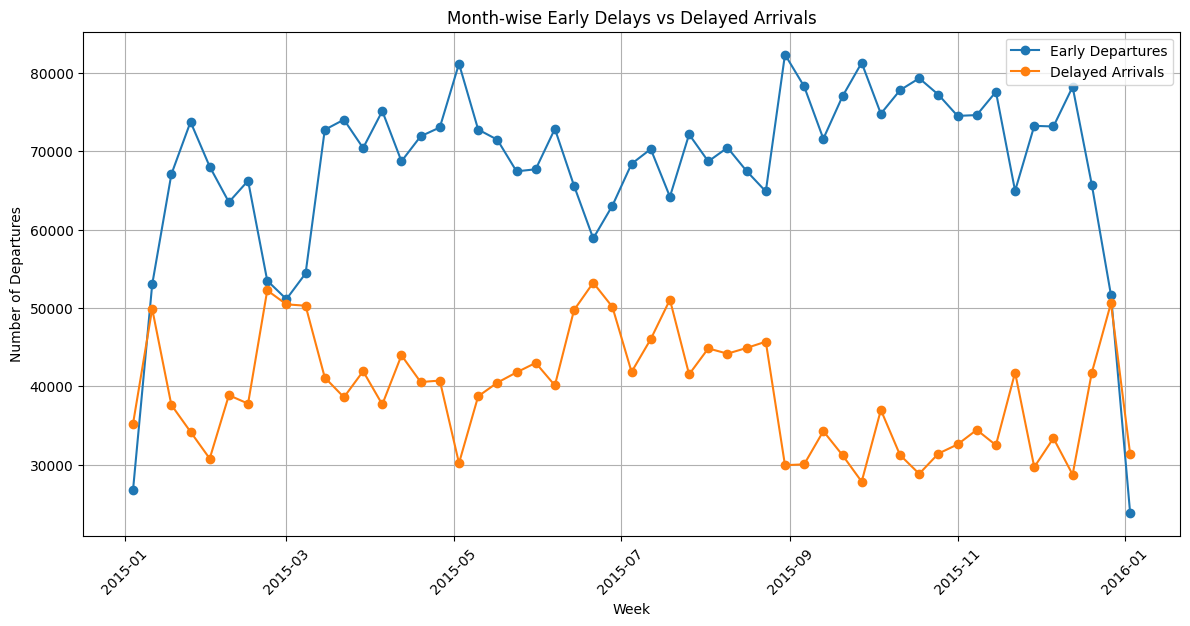

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_df['DATE'], monthly_df['num_departure_delays'], label='Early Departures', marker='o')
plt.plot(monthly_df['DATE'], monthly_df['num_arrival_delays'], label='Delayed Arrivals', marker='o')

plt.title('Month-wise Early Delays vs Delayed Arrivals')
plt.xlabel('Week')
plt.ylabel('Number of Departures')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


### Delayed departures VS early arrivals

In [76]:
delay_conditions = '>0'
delay_departure_counts = (
    filter_flight_df[filter_flight_df['DEPARTURE_DELAY'] > 0]
      .groupby(['YEAR', 'MONTH', 'DAY'])
      .size()                      # counts rows in each group
      .reset_index(name='num_departure_delays')
)

early_arrival_counts = (
    filter_flight_df[filter_flight_df['ARRIVAL_DELAY'] <= 0]
      .groupby(['YEAR', 'MONTH', 'DAY'])
      .size()                      # counts rows in each group
      .reset_index(name='num_arrival_delays')
)

filter_agg_df = pd.merge(delay_departure_counts, early_arrival_counts, on=['YEAR', 'MONTH', 'DAY'], how='outer')
filter_agg_df['DATE'] = pd.to_datetime(filter_agg_df[['YEAR', 'MONTH', 'DAY']])
filter_agg_df.set_index('DATE', inplace=True)
monthly_df = (
    filter_agg_df
    .resample('W')  # daily frequency
    .sum()[[ 'num_departure_delays', 'num_arrival_delays']]
    .reset_index()
)

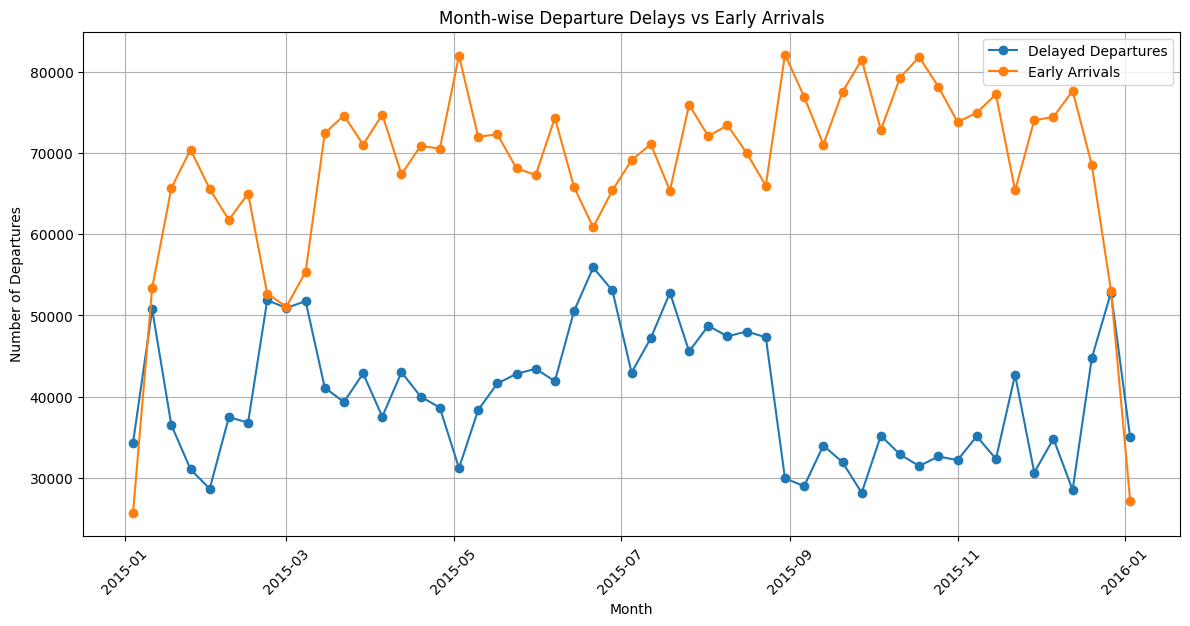

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(monthly_df['DATE'], monthly_df['num_departure_delays'], label='Delayed Departures', marker='o')
plt.plot(monthly_df['DATE'], monthly_df['num_arrival_delays'], label='Early Arrivals', marker='o')

plt.title('Month-wise Departure Delays vs Early Arrivals')
plt.xlabel('Month')
plt.ylabel('Number of Departures')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## Lets find answers to certain questions before building the model

#### 1. Which flight has the most delays??
#### 2. Which flight has the no delays, ??
#### 3. Which flight route has the most delays (source & destination airport)??
#### 4. Which flight route has the least delays (source & destination airport)??

In [78]:
flight_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [79]:
flights_delays_df = flight_df[['YEAR', 'MONTH', 'AIRLINE','FLIGHT_NUMBER','ORIGIN_AIRPORT','DESTINATION_AIRPORT','DEPARTURE_DELAY','ARRIVAL_DELAY']]

In [80]:
airlines_df= pd.read_csv('/kaggle/input/flight-delays/airlines.csv')

In [81]:
# Step 1: Total flights (delayed + on time)
total_flights = (
    flights_delays_df
    .groupby(['AIRLINE', 'FLIGHT_NUMBER'])
    .size()
    .reset_index(name='total_flights')
)

# Step 2: Arrival delays info
arrival_delay_count = (
    flights_delays_df[flights_delays_df['ARRIVAL_DELAY'] > 0]
    .groupby(['AIRLINE', 'FLIGHT_NUMBER'])
    .agg(
        num_arrival_delays=('ARRIVAL_DELAY', 'count'),
        avg_arrival_delay=('ARRIVAL_DELAY', 'mean'),
        total_arrival_delay=('ARRIVAL_DELAY', 'sum'),
        max_arrival_delay=('ARRIVAL_DELAY', 'max'),
    )
    .reset_index()
)

# Step 3: Merge
arrival_delay_count = pd.merge(
    arrival_delay_count,
    total_flights,
    on=['AIRLINE', 'FLIGHT_NUMBER'],
    how='left'
)

arrival_delay_count_updated = pd.merge(
    arrival_delay_count,
    airlines_df,
    left_on= 'AIRLINE',
    right_on='IATA_CODE',
    how='left'
)

arrival_delay_count_updated.head()


,AIRLINE_x,FLIGHT_NUMBER,num_arrival_delays,avg_arrival_delay,total_arrival_delay,max_arrival_delay,total_flights,IATA_CODE,AIRLINE_y
0,AA,1,73,22.589041,1649.0,131.0,318,AA,American Airlines Inc.
1,AA,2,77,55.519481,4275.0,330.0,352,AA,American Airlines Inc.
2,AA,3,93,34.344086,3194.0,352.0,356,AA,American Airlines Inc.
3,AA,4,83,31.963855,2653.0,214.0,260,AA,American Airlines Inc.
4,AA,5,254,49.822835,12655.0,1295.0,574,AA,American Airlines Inc.


## Which flight has the most delays??

In [82]:


arrival_delay_count_airline_wise = (arrival_delay_count_updated
        .groupby(['AIRLINE_y']) 
        .agg( 
        num_arrival_delay_airline=('num_arrival_delays', 'sum'),
        total_flights=('total_flights','sum')
        ) 
        .reset_index()
    )

arrival_delay_count_airline_wise['perc_delay'] = (
    arrival_delay_count_airline_wise['num_arrival_delay_airline'] / 
    arrival_delay_count_airline_wise['total_flights']
)*100
arrival_delay_count_airline_wise.sort_values(ascending=False, by='perc_delay')

,AIRLINE_y,num_arrival_delay_airline,total_flights,perc_delay
10,Spirit Air Lines,56887,117366,48.469744
5,Frontier Airlines Inc.,41232,90797,45.411192
6,Hawaiian Airlines Inc.,30179,76272,39.567600
13,Virgin America,24180,61868,39.083209
11,US Airways Inc.,76285,198686,38.394754
7,JetBlue Airways,101998,266991,38.202786
8,Skywest Airlines Inc.,222435,588306,37.809405
9,Southwest Airlines Co.,470767,1260039,37.361304
3,Atlantic Southeast Airlines,213217,571921,37.280848
12,United Air Lines Inc.,186227,515719,36.110169


<Axes: xlabel='perc_delay', ylabel='AIRLINE_y'>

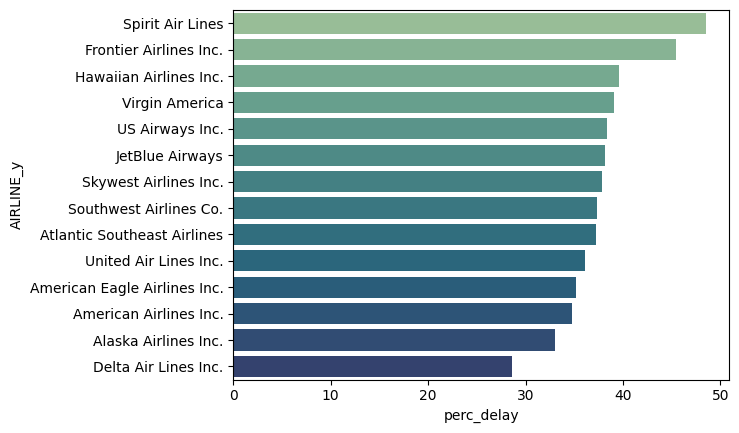

In [83]:
import seaborn as sns

sns.barplot(
    data=arrival_delay_count_airline_wise.sort_values(ascending=False,by='perc_delay'),
    x='perc_delay',
    y='AIRLINE_y',
    palette='crest'
)


## Which flight has the no delays ??

In [84]:
# Step 1: Total flights (delayed + on time)
total_flights = (
    flights_delays_df
    .groupby(['AIRLINE', 'FLIGHT_NUMBER'])
    .size()
    .reset_index(name='total_flights')
)

# Step 2: Arrival delays info
arrival_no_delay_count = (
    flights_delays_df[flights_delays_df['ARRIVAL_DELAY'] <= 0]
    .groupby(['AIRLINE', 'FLIGHT_NUMBER'])
    .agg(
        num_arrival_delays=('ARRIVAL_DELAY', 'count'),
        avg_arrival_delay=('ARRIVAL_DELAY', 'mean'),
        total_arrival_delay=('ARRIVAL_DELAY', 'sum'),
        max_arrival_delay=('ARRIVAL_DELAY', 'max'),
    )
    .reset_index()
)

# Step 3: Merge
arrival_no_delay_count = pd.merge(
    arrival_no_delay_count,
    total_flights,
    on=['AIRLINE', 'FLIGHT_NUMBER'],
    how='left'
)

arrival_no_delay_count_updated = pd.merge(
    arrival_no_delay_count,
    airlines_df,
    left_on= 'AIRLINE',
    right_on='IATA_CODE',
    how='left'
)

arrival_no_delay_count_updated.head()


,AIRLINE_x,FLIGHT_NUMBER,num_arrival_delays,avg_arrival_delay,total_arrival_delay,max_arrival_delay,total_flights,IATA_CODE,AIRLINE_y
0,AA,1,241,-21.605809,-5207.0,0.0,318,AA,American Airlines Inc.
1,AA,2,272,-22.139706,-6022.0,0.0,352,AA,American Airlines Inc.
2,AA,3,258,-18.484496,-4769.0,0.0,356,AA,American Airlines Inc.
3,AA,4,169,-19.680473,-3326.0,0.0,260,AA,American Airlines Inc.
4,AA,5,312,-12.442308,-3882.0,0.0,574,AA,American Airlines Inc.


In [85]:


arrival_no_delay_count_airline_wise = (arrival_no_delay_count_updated
        .groupby(['AIRLINE_y']) 
        .agg( 
        num_arrival_delay_airline=('num_arrival_delays', 'sum'),
        total_flights=('total_flights','sum')
        ) 
        .reset_index()
    )

arrival_no_delay_count_airline_wise['perc_on_time'] = (
    arrival_no_delay_count_airline_wise['num_arrival_delay_airline'] / 
    arrival_no_delay_count_airline_wise['total_flights']
)*100
arrival_no_delay_count_airline_wise.sort_values(ascending=False, by='perc_on_time')

,AIRLINE_y,num_arrival_delay_airline,total_flights,perc_on_time
4,Delta Air Lines Inc.,619435,875844,70.724353
0,Alaska Airlines Inc.,114486,172509,66.365233
1,American Airlines Inc.,460744,725967,63.466246
12,United Air Lines Inc.,321535,515718,62.347058
9,Southwest Airlines Co.,771636,1261629,61.161879
8,Skywest Airlines Inc.,354379,588307,60.237087
6,Hawaiian Airlines Inc.,45862,76272,60.129536
7,JetBlue Airways,160044,266994,59.942920
13,Virgin America,37068,61894,59.889488
3,Atlantic Southeast Airlines,341535,571948,59.714345


<Axes: xlabel='perc_on_time', ylabel='AIRLINE_y'>

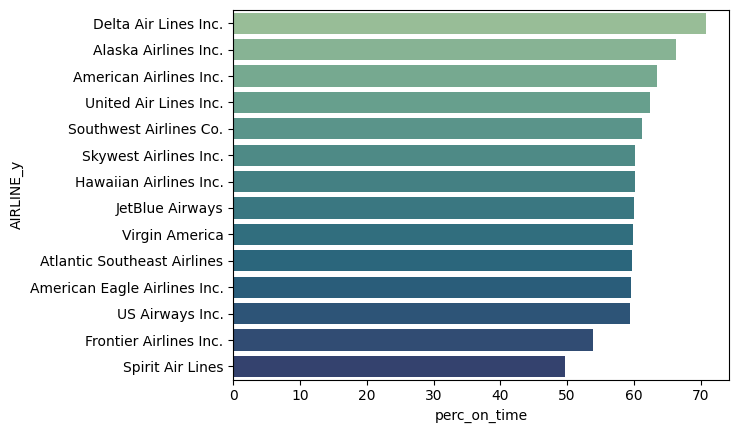

In [86]:
import seaborn as sns

sns.barplot(
    data=arrival_no_delay_count_airline_wise.sort_values(ascending=False,by='perc_on_time'),
    x='perc_on_time',
    y='AIRLINE_y',
    palette='crest'
)


## Which flight route has the most delays (source & destination airport)??

In [87]:
airports_df = pd.read_csv('/kaggle/input/flight-delays/airports.csv')

airports_df = airports_df[['AIRPORT','IATA_CODE','STATE', 'CITY']]

In [88]:
total_flights = (
    flights_delays_df
    .groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'])
    .size()
    .reset_index(name='total_flights')
)

total_flights

,ORIGIN_AIRPORT,DESTINATION_AIRPORT,total_flights
0,10135,10397,83
1,10135,11433,71
2,10135,13930,72
3,10136,11298,189
4,10140,10397,86
...,...,...,...
12372,XNA,SFO,52
12373,XNA,SLC,1
12374,YAK,CDV,331
12375,YAK,JNU,331


In [89]:
total_flights = (
    flights_delays_df
    .groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT'])
    .size()
    .reset_index(name='total_flights')
)

arrival_delay_count = (flights_delays_df[flights_delays_df['ARRIVAL_DELAY'] >0 ] 
        .groupby(['ORIGIN_AIRPORT','DESTINATION_AIRPORT']) 
        .agg( 
        num_arrival_delays=('ARRIVAL_DELAY', 'count'), 
        avg_arrival_delay=('ARRIVAL_DELAY', 'mean'),
        total_arrival_delay=('ARRIVAL_DELAY', 'sum'),
        max_arrival_delay=('ARRIVAL_DELAY', 'max'),
        ) 
        .reset_index()
    )

# dep_delay_count =flights_delays_df[flights_delays_df['DEPARTURE_DELAY'] >0 ].groupby(['AIRLINE','FLIGHT_NUMBER']).size().reset_index(name='num_departure_delays')

# arrival_delays_df = pd.merge(arrival_delay_count,dep_delay_count, on=['AIRLINE','FLIGHT_NUMBER'], how='left' )

# arrival_delay_count.sort_values(ascending=False, by='num_arrival_delays')

arrival_delay_count = pd.merge(
    arrival_delay_count,
    total_flights,
    on=['ORIGIN_AIRPORT', 'DESTINATION_AIRPORT'],
    how='left'
)


arrival_delay_count_updated = pd.merge(
    arrival_delay_count,
    airports_df,
    left_on=['ORIGIN_AIRPORT'],
    right_on=['IATA_CODE'],
    how='left'
)

arrival_delay_count_updated = pd.merge(
    arrival_delay_count_updated,
    airports_df,
    left_on=['DESTINATION_AIRPORT'],
    right_on=['IATA_CODE'],
    how='left'
)

arrival_delay_count_updated = arrival_delay_count_updated.dropna()
arrival_delay_count_updated = arrival_delay_count_updated[['ORIGIN_AIRPORT',	'DESTINATION_AIRPORT','num_arrival_delays','avg_arrival_delay','total_arrival_delay','max_arrival_delay','total_flights','STATE_x','STATE_y']]
arrival_delay_count_updated.head()


,ORIGIN_AIRPORT,DESTINATION_AIRPORT,num_arrival_delays,avg_arrival_delay,total_arrival_delay,max_arrival_delay,total_flights,STATE_x,STATE_y
6654,ABE,ATL,298,30.426174,9067.0,486.0,898,PA,GA
6655,ABE,DTW,268,37.500000,10050.0,350.0,711,PA,MI
6656,ABE,ORD,260,42.376923,11018.0,612.0,665,PA,IL
6657,ABI,DFW,686,39.295918,26957.0,583.0,2329,TX,TX
6658,ABQ,ATL,172,48.296512,8307.0,941.0,801,NM,GA


In [90]:
arrival_no_delay_count_state_wise = (arrival_delay_count_updated
        .groupby(['STATE_x','STATE_y']) 
        .agg( 
        num_arrival_delays=('num_arrival_delays', 'sum'),
        total_flights=('total_flights','sum')
        ) 
        .reset_index()
    )


arrival_no_delay_count_state_wise = arrival_no_delay_count_state_wise[arrival_no_delay_count_state_wise['total_flights'] > 100]

arrival_no_delay_count_state_wise['pct_delay'] = arrival_no_delay_count_state_wise['num_arrival_delays']*100/arrival_no_delay_count_state_wise['total_flights']
arrival_no_delay_count_state_wise['Flight_route'] = arrival_no_delay_count_state_wise['STATE_x']+' - '+arrival_no_delay_count_state_wise['STATE_y']
arrival_no_delay_count_state_wise.sort_values(ascending=False, by='pct_delay')

,STATE_x,STATE_y,num_arrival_delays,total_flights,pct_delay,Flight_route
839,OH,PA,67,104,64.423077,OH - PA
845,OH,WA,96,151,63.576159,OH - WA
307,IL,ID,382,606,63.036304,IL - ID
1000,TX,HI,963,1535,62.736156,TX - HI
37,AS,HI,67,107,62.616822,AS - HI
...,...,...,...,...,...,...
1195,WY,MN,16,134,11.940299,WY - MN
1154,WA,OK,17,153,11.111111,WA - OK
679,NH,GA,33,333,9.909910,NH - GA
616,MT,OR,5,116,4.310345,MT - OR


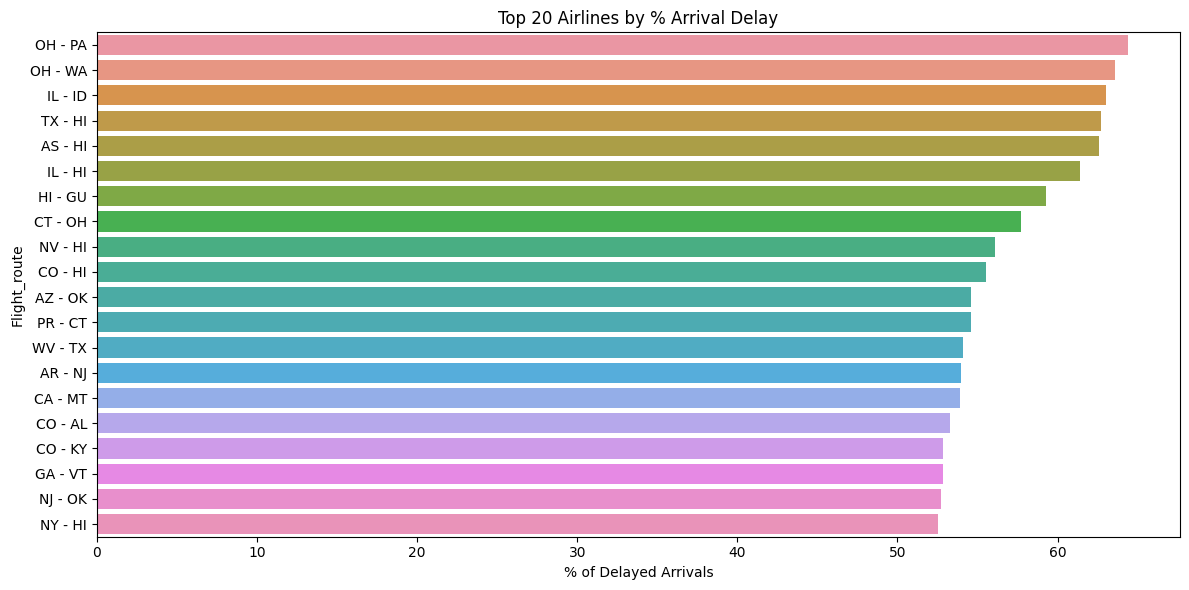

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

top20 = arrival_no_delay_count_state_wise.sort_values(by='pct_delay', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top20, x='pct_delay', y='Flight_route')  # or FLIGHT_NUMBER if that’s your index
plt.title("Top 20 Airlines by % Arrival Delay")
plt.xlabel("% of Delayed Arrivals")
plt.ylabel("Flight_route")
plt.tight_layout()
plt.show()


## Model building

what should the model do? based on given features it should predict if the flight will get delayed or not. so it's a classification problem. 

1. Logistic regression
2. LDA
3. QDA
4. With ridge/ lasso regression**
5. gradient descent (XGBoost)

Columns to keep

| Feature                                 | Why?                                          |
| --------------------------------------- | --------------------------------------------- |
| `MONTH`, `DAY`, `DAY_OF_WEEK`           | Temporal patterns in delay                    |
| `AIRLINE`                               | Different airlines have different delay rates |
| `ORIGIN_AIRPORT`, `DESTINATION_AIRPORT` | Some airports are more delay-prone            |
| `SCHEDULED_DEPARTURE`                   | Time of day strongly affects delays           |
| `SCHEDULED_ARRIVAL`                     | May correlate with congestion                 |
| `SCHEDULED_TIME`, `DISTANCE`            | Flight length impacts likelihood of delay     |


In [92]:
flight_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [93]:
flight_df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [94]:
flight_df['DELAYED'] = (flight_df['ARRIVAL_DELAY'] > 5).astype(int)
flight_df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DELAYED
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0


In [95]:
flight_df['DELAYED'].value_counts()/ flight_df.shape[0]

DELAYED
0    0.726232
1    0.273768
Name: count, dtype: float64

<function matplotlib.pyplot.show(close=None, block=None)>

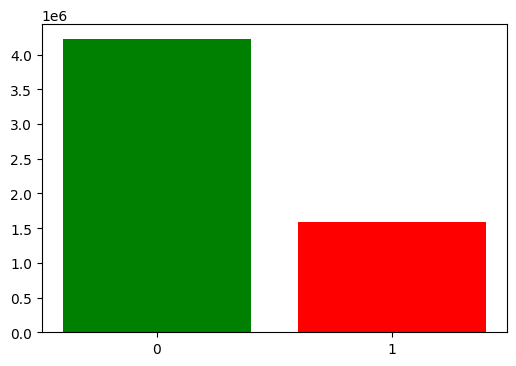

In [96]:
## look at the 
import matplotlib.pyplot as plt
delay_counts = flight_df['DELAYED'].value_counts().sort_index()

plt.figure(figsize=(6, 4))
plt.bar(delay_counts.index.astype(str),delay_counts.values, color=['green', 'red'] )
plt.show

In [97]:
flight_df_filtered = flight_df[['MONTH', 'DAY', 'DAY_OF_WEEK',	'AIRLINE','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',	
'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL','SCHEDULED_TIME', 'DISTANCE','DELAYED']]

flight_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 11 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   ORIGIN_AIRPORT       object 
 5   DESTINATION_AIRPORT  object 
 6   SCHEDULED_DEPARTURE  int64  
 7   SCHEDULED_ARRIVAL    int64  
 8   SCHEDULED_TIME       float64
 9   DISTANCE             int64  
 10  DELAYED              int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 488.4+ MB


In [98]:
flight_df_filtered.isnull().sum()

MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
SCHEDULED_ARRIVAL      0
SCHEDULED_TIME         6
DISTANCE               0
DELAYED                0
dtype: int64

### Transformations

In [99]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


categorical_features = ['AIRLINE','ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']
numerical_features = ['MONTH', 'DAY', 'DAY_OF_WEEK','SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL','SCHEDULED_TIME', 'DISTANCE']

for col in categorical_features:
    flight_df_filtered[col] = flight_df_filtered[col].astype(str)

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num',Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ]), numerical_features)
])


/tmp/ipykernel_35/1266013550.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df_filtered[col] = flight_df_filtered[col].astype(str)
/tmp/ipykernel_35/1266013550.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flight_df_filtered[col] = flight_df_filtered[col].astype(str)
/tmp/ipykernel_35/1266013550.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

## Logistic Regression

In [100]:
pipeline = Pipeline([
    ('preprocess', preprocessor ),
    ('clf', LogisticRegression(max_iter=10))
])

In [101]:
x = flight_df_filtered.drop(columns=['DELAYED'])
y = flight_df_filtered['DELAYED']

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 10 columns):
 #   Column               Dtype  
---  ------               -----  
 0   MONTH                int64  
 1   DAY                  int64  
 2   DAY_OF_WEEK          int64  
 3   AIRLINE              object 
 4   ORIGIN_AIRPORT       object 
 5   DESTINATION_AIRPORT  object 
 6   SCHEDULED_DEPARTURE  int64  
 7   SCHEDULED_ARRIVAL    int64  
 8   SCHEDULED_TIME       float64
 9   DISTANCE             int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 444.0+ MB


In [102]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, stratify=y, random_state=42
)

pipeline.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['AIRLINE', 'ORIGIN_AIRPORT',
                                                   'DESTINATION_AIRPORT']),
                                                 ('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scale',
                                                                   StandardScaler())]),
                                                  ['MONTH', 'DAY',
                                                   'DAY_OF_WEEK',
                                                   'SCHEDULED_DEPARTURE',
                                                   'SCHEDULED_ARRIVAL',
                                                   'SCHEDULED_TIME',
                                                   'DISTANCE'])])),
                ('clf', LogisticRegression(max_iter=10))])

In [103]:
y_pred = pipeline.predict(x_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7262007052661246
              precision    recall  f1-score   support

           0       0.73      1.00      0.84    845201
           1       0.50      0.01      0.02    318615

    accuracy                           0.73   1163816
   macro avg       0.61      0.50      0.43   1163816
weighted avg       0.66      0.73      0.62   1163816



In [104]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(x_train, y_train)
y_dummy = dummy.predict(x_test)
print("Dummy Accuracy:", accuracy_score(y_test, y_dummy))


Dummy Accuracy: 0.7262324972332396


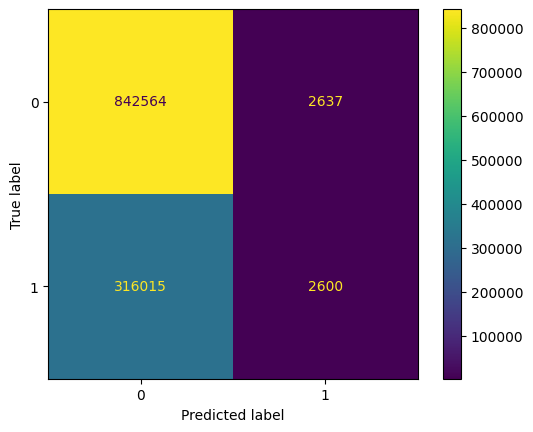

In [105]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [106]:
from sklearn.linear_model import LogisticRegression

ridge_clf = Pipeline([
    ('preprocess', preprocessor),
    ('clf', LogisticRegression(penalty='l2', C=1.0, max_iter=10))
])

ridge_clf.fit(x_train, y_train)
y_pred_ridge = ridge_clf.predict(x_test)
print("Ridge Accuracy:", accuracy_score(y_test, y_pred_ridge))
print(classification_report(y_test, y_pred_ridge))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ridge Accuracy: 0.7262007052661246
              precision    recall  f1-score   support

           0       0.73      1.00      0.84    845201
           1       0.50      0.01      0.02    318615

    accuracy                           0.73   1163816
   macro avg       0.61      0.50      0.43   1163816
weighted avg       0.66      0.73      0.62   1163816



## Gradient Descent - XGBoost

In [107]:
from xgboost import XGBClassifier


# Define the XGBoost pipeline
xgb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

# Train-test split
x = flight_df_filtered.drop(columns=['DELAYED'])
y = flight_df_filtered['DELAYED']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, stratify=y, random_state=42
)

# Fit and evaluate
xgb_pipeline.fit(x_train, y_train)
y_pred_xgb = xgb_pipeline.predict(x_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7372118960385491
              precision    recall  f1-score   support

           0       0.74      0.98      0.84    845201
           1       0.63      0.10      0.17    318615

    accuracy                           0.74   1163816
   macro avg       0.69      0.54      0.51   1163816
weighted avg       0.71      0.74      0.66   1163816

